# Undergraduate Thesis Project

In [1]:
#importing libraries
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl,plt
import pandas as pd
%matplotlib inline

Data Gathering and Exploratory Data Analysis

In [2]:
#data from LQ45_1.xlsx
raw = pd.read_excel('IDX30.xlsx')
raw

,Date,ADRO JK,ANTM JK,ARTO JK,ASII JK,BBCA JK,BBNI JK,BBRI JK,BMRI JK,BRPT JK,...,MDKA JK,PGAS JK,PTBA JK,SMGR JK,TBIG JK,TINS JK,TLKM JK,TOWR JK,UNTR JK,UNVR JK
0,2020-06-01,833.449158,574.001099,829.328369,4518.950195,5503.815430,4141.191406,2891.024658,4476.530762,1300.431885,...,1340.0,957.801331,1581.151733,8977.059570,1055.415161,562.110962,2822.726563,1003.374451,14813.639648,7367.557617
1,2020-06-08,834.762573,564.272278,1078.126831,4329.154785,5450.939941,4355.558594,2816.657471,4513.450684,1181.761230,...,1300.0,971.749939,1709.933228,8953.247070,1059.744385,571.802551,2647.944336,956.267700,14250.546875,7504.840820
2,2020-06-15,819.012329,593.458740,1119.593262,4419.533691,5359.610352,4365.302734,2881.728760,4504.221191,1147.149048,...,1280.0,1004.296570,1631.233398,9048.495117,1108.356567,586.339905,2866.421875,970.399658,15463.361328,7367.557617
3,2020-06-22,799.324524,588.594299,1115.446655,4428.571777,5426.905762,4462.742676,2816.657471,4614.980469,1137.259888,...,1355.0,1055.441284,1700.415405,9048.495117,1079.189209,576.648315,2787.769775,946.846313,14272.206055,7230.273926
4,2020-06-29,819.012329,586.440979,2405.052246,4525.481934,5643.212891,4443.254395,2835.249268,4614.980469,1166.927490,...,1360.0,1032.193726,1692.161011,9310.424805,1093.772949,591.185669,2726.596436,1026.927856,15558.618164,7230.273926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2022-11-28,3598.719971,2040.000000,4200.000000,6125.000000,8865.388672,9750.000000,4829.274414,10525.000000,791.666687,...,4440.0,1890.000000,3770.000000,7675.000000,2410.000000,1235.000000,4000.000000,1148.784790,29225.000000,4640.853027
131,2022-12-05,3439.815430,1935.000000,3530.000000,5675.000000,8575.000000,9550.000000,4740.392090,9925.000000,771.750549,...,4380.0,1800.000000,3620.000000,6930.717285,2410.000000,1165.000000,3650.000000,1104.026855,26125.000000,4620.000000
132,2022-12-12,3636.109131,2020.000000,4060.000000,5775.000000,8600.000000,9800.000000,4918.156738,10100.000000,771.750549,...,4300.0,1830.000000,3800.000000,7025.000000,2300.000000,1195.000000,3680.000000,1074.188354,26550.000000,4870.000000
133,2022-12-19,3561.330566,2000.000000,3740.000000,5675.000000,8500.000000,9325.000000,4819.398438,9925.000000,780.000000,...,4010.0,1790.000000,3740.000000,6750.000000,2320.000000,1165.000000,3780.000000,1055.000000,26875.000000,4820.000000


In [3]:
#dropping the null data
data = raw.dropna()

In [4]:
#mgathering information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     135 non-null    datetime64[ns]
 1   ADRO JK  135 non-null    float64       
 2   ANTM JK  135 non-null    float64       
 3   ARTO JK  135 non-null    float64       
 4   ASII JK  135 non-null    float64       
 5   BBCA JK  135 non-null    float64       
 6   BBNI JK  135 non-null    float64       
 7   BBRI JK  135 non-null    float64       
 8   BMRI JK  135 non-null    float64       
 9   BRPT JK  135 non-null    float64       
 10  CPIN JK  135 non-null    float64       
 11  EMTK JK  135 non-null    float64       
 12  HRUM JK  135 non-null    float64       
 13  ICBP JK  135 non-null    float64       
 14  INCO JK  135 non-null    float64       
 15  INDF JK  135 non-null    float64       
 16  INKP JK  135 non-null    float64       
 17  ITMG JK  135 non-null    float64   

<AxesSubplot:xlabel='Date'>

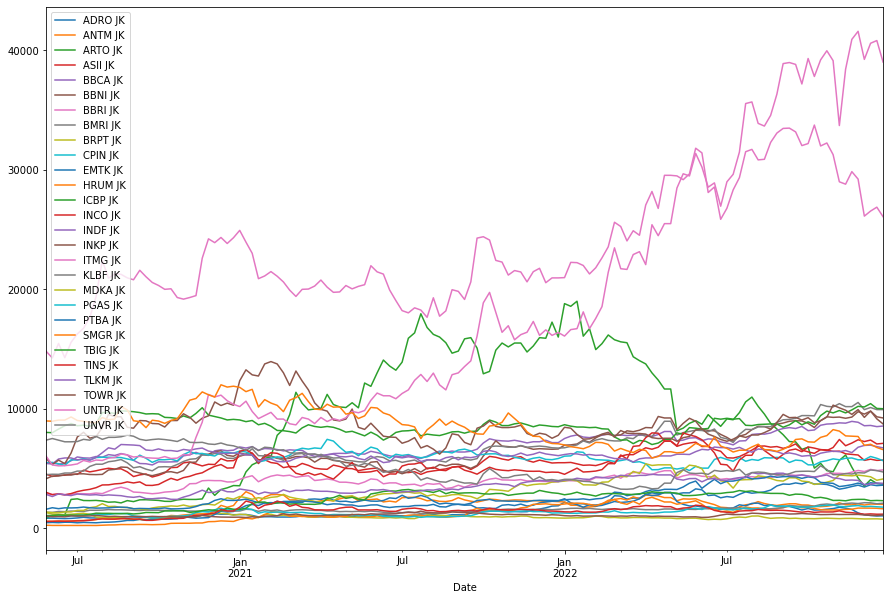

In [5]:
#Normalized prices of financial instruments overtime
#Harga yang dinormalisasi dari instrumen finansial selama periode waktu
data.plot('Date',figsize=(15,10))

In [6]:
#symbols from LQ45, except GOTO dan BUKA
rawdatasymb =  ['ADRO JK','ANTM JK','ARTO JK','ASII JK','BBCA JK',
               'BBNI JK','BBRI JK','BMRI JK','BRPT JK','CPIN JK',
              'EMTK JK','HRUM JK','ICBP JK','INCO JK','INDF JK','INKP JK',
              'ITMG JK','KLBF JK','MDKA JK','PGAS JK','PTBA JK','SMGR JK','TBIG JK'
              ,'TINS JK','TLKM JK','TOWR JK','UNTR JK','UNVR JK']
rawdatasymb

['ADRO JK',
 'ANTM JK',
 'ARTO JK',
 'ASII JK',
 'BBCA JK',
 'BBNI JK',
 'BBRI JK',
 'BMRI JK',
 'BRPT JK',
 'CPIN JK',
 'EMTK JK',
 'HRUM JK',
 'ICBP JK',
 'INCO JK',
 'INDF JK',
 'INKP JK',
 'ITMG JK',
 'KLBF JK',
 'MDKA JK',
 'PGAS JK',
 'PTBA JK',
 'SMGR JK',
 'TBIG JK',
 'TINS JK',
 'TLKM JK',
 'TOWR JK',
 'UNTR JK',
 'UNVR JK']

In [7]:
#number of stocks in LQ45 excluding GOTO and BUKA
#jumlah indeks pada data mentah LQ45 (kecuali GOTO dan BUKA)
noaraw = len(rawdatasymb)
noaraw

28

In [8]:
#raw data
#data awal yang belum diolah
dataraw = data[rawdatasymb]
dataraw

,ADRO JK,ANTM JK,ARTO JK,ASII JK,BBCA JK,BBNI JK,BBRI JK,BMRI JK,BRPT JK,CPIN JK,...,MDKA JK,PGAS JK,PTBA JK,SMGR JK,TBIG JK,TINS JK,TLKM JK,TOWR JK,UNTR JK,UNVR JK
0,833.449158,574.001099,829.328369,4518.950195,5503.815430,4141.191406,2891.024658,4476.530762,1300.431885,5461.924805,...,1340.0,957.801331,1581.151733,8977.059570,1055.415161,562.110962,2822.726563,1003.374451,14813.639648,7367.557617
1,834.762573,564.272278,1078.126831,4329.154785,5450.939941,4355.558594,2816.657471,4513.450684,1181.761230,5509.419434,...,1300.0,971.749939,1709.933228,8953.247070,1059.744385,571.802551,2647.944336,956.267700,14250.546875,7504.840820
2,819.012329,593.458740,1119.593262,4419.533691,5359.610352,4365.302734,2881.728760,4504.221191,1147.149048,5390.682129,...,1280.0,1004.296570,1631.233398,9048.495117,1108.356567,586.339905,2866.421875,970.399658,15463.361328,7367.557617
3,799.324524,588.594299,1115.446655,4428.571777,5426.905762,4462.742676,2816.657471,4614.980469,1137.259888,5248.196777,...,1355.0,1055.441284,1700.415405,9048.495117,1079.189209,576.648315,2787.769775,946.846313,14272.206055,7230.273926
4,819.012329,586.440979,2405.052246,4525.481934,5643.212891,4443.254395,2835.249268,4614.980469,1166.927490,5723.146973,...,1360.0,1032.193726,1692.161011,9310.424805,1093.772949,591.185669,2726.596436,1026.927856,15558.618164,7230.273926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,3598.719971,2040.000000,4200.000000,6125.000000,8865.388672,9750.000000,4829.274414,10525.000000,791.666687,5725.000000,...,4440.0,1890.000000,3770.000000,7675.000000,2410.000000,1235.000000,4000.000000,1148.784790,29225.000000,4640.853027
131,3439.815430,1935.000000,3530.000000,5675.000000,8575.000000,9550.000000,4740.392090,9925.000000,771.750549,5725.000000,...,4380.0,1800.000000,3620.000000,6930.717285,2410.000000,1165.000000,3650.000000,1104.026855,26125.000000,4620.000000
132,3636.109131,2020.000000,4060.000000,5775.000000,8600.000000,9800.000000,4918.156738,10100.000000,771.750549,6000.000000,...,4300.0,1830.000000,3800.000000,7025.000000,2300.000000,1195.000000,3680.000000,1074.188354,26550.000000,4870.000000
133,3561.330566,2000.000000,3740.000000,5675.000000,8500.000000,9325.000000,4819.398438,9925.000000,780.000000,5850.000000,...,4010.0,1790.000000,3740.000000,6750.000000,2320.000000,1165.000000,3780.000000,1055.000000,26875.000000,4820.000000


In [9]:
#compounded return of the stocks in LQ45
raw_rets = np.log(dataraw/ dataraw.shift(1))
raw_rets

,ADRO JK,ANTM JK,ARTO JK,ASII JK,BBCA JK,BBNI JK,BBRI JK,BMRI JK,BRPT JK,CPIN JK,...,MDKA JK,PGAS JK,PTBA JK,SMGR JK,TBIG JK,TINS JK,TLKM JK,TOWR JK,UNTR JK,UNVR JK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001575,-0.017094,0.262364,-0.042907,-0.009654,0.050469,-0.026060,0.008214,-0.095691,0.008658,...,-0.030305,0.014458,0.078301,-0.002656,0.004094,0.017094,-0.063920,-0.048086,-0.038753,0.018462
2,-0.019048,0.050431,0.037740,0.020662,-0.016897,0.002235,0.022839,-0.002047,-0.029726,-0.021787,...,-0.015504,0.032944,-0.047118,0.010582,0.044851,0.025106,0.079281,0.014670,0.081678,-0.018462
3,-0.024332,-0.008231,-0.003711,0.002043,0.012478,0.022076,-0.022839,0.024293,-0.008658,-0.026787,...,0.056941,0.049672,0.041536,0.000000,-0.026668,-0.016667,-0.027823,-0.024571,-0.080159,-0.018809
4,0.024332,-0.003665,0.768317,0.021647,0.039084,-0.004376,0.006579,0.000000,0.025752,0.086634,...,0.003683,-0.022273,-0.004866,0.028536,0.013423,0.024898,-0.022188,0.081190,0.086301,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.031665,0.045120,-0.194156,-0.008130,-0.008392,0.047253,0.029048,0.033820,-0.030962,-0.025864,...,0.013606,0.018692,0.035091,-0.003252,0.008333,-0.047440,-0.007472,0.008696,-0.021160,0.023632
131,-0.045160,-0.052842,-0.173787,-0.076308,-0.033304,-0.020726,-0.018576,-0.058697,-0.025479,0.000000,...,-0.013606,-0.048790,-0.040601,-0.102005,0.000000,-0.058350,-0.091567,-0.039740,-0.112132,-0.004503
132,0.055496,0.042990,0.139885,0.017468,0.002911,0.025841,0.036814,0.017479,0.000000,0.046917,...,-0.018434,0.016529,0.048527,0.013512,-0.046718,0.025425,0.008186,-0.027399,0.016137,0.052699
133,-0.020780,-0.009950,-0.082097,-0.017468,-0.011696,-0.049683,-0.020285,-0.017479,0.010633,-0.025318,...,-0.069824,-0.022100,-0.015915,-0.039933,0.008658,-0.025425,0.026811,-0.018025,0.012167,-0.010320


In [11]:
#expected return of stocks (E(r))
#ekspektasi pengembalian saham (E(r))
raw_rets.mean()

ADRO JK    0.010916
ANTM JK    0.009259
ARTO JK    0.011200
ASII JK    0.001733
BBCA JK    0.003287
BBNI JK    0.005977
BBRI JK    0.003905
BMRI JK    0.005942
BRPT JK   -0.004058
CPIN JK    0.000253
EMTK JK    0.006053
HRUM JK    0.014089
ICBP JK    0.001650
INCO JK    0.006424
INDF JK    0.001616
INKP JK    0.003024
ITMG JK    0.013935
KLBF JK    0.003377
MDKA JK    0.008382
PGAS JK    0.004541
PTBA JK    0.006324
SMGR JK   -0.002324
TBIG JK    0.005813
TINS JK    0.005471
TLKM JK    0.002120
TOWR JK    0.000686
UNTR JK    0.004220
UNVR JK   -0.003355
dtype: float64

We only use positively returned stocks. We can see that there are some index with negative returns :BRPT JK, SMGR JK, and UNVR JK. As a result, there are total of 25 index that will be used in the calculation. Then, we will sort from the highest return to the lowest return. The next step is too conclude an experiment to the theorems for k = [4,10]

Akan dipakai indeks-indeks dengan return positif. Dapat dilihat bahwa terdapat  indeks dengan return negatif:BRPT JK, SMGR JK, dan UNVR JK.Sehingga, terdapat total 25 indeks yang akan dipakai pada perhitungan. Kemudian, akan diurutkan indeks dari return tertinggi ke terendah. Lalu, akan dicoba untuk jumlah k aset dalam portfolio sebanyak k = [4,10]

In [12]:
symbols4 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK']
symbols5 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK','ANTM JK']
symbols6 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK','ANTM JK','MDKA JK']
symbols7 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK','ANTM JK','MDKA JK','INCO JK']
symbols8 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK','ANTM JK','MDKA JK','INCO JK','PTBA JK']
symbols9 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK','ANTM JK','MDKA JK','INCO JK','PTBA JK',
            'EMTK JK']
symbols10 = ['HRUM JK','ITMG JK','ARTO JK','ADRO JK','ANTM JK','MDKA JK','INCO JK','PTBA JK',
            'EMTK JK','BBNI JK']

In [13]:
#amount of indeks with nonnegative returns
#jumlah indeks yang pengembaliannya nonnegatif
noa4 = len(symbols4)
noa5 = len(symbols5)
noa6 = len(symbols6)
noa7 = len(symbols7)
noa8 = len(symbols8)
noa9 = len(symbols9)
noa10 = len(symbols10)
print('Number of Asset in 4 index :',noa4)
print('Number of Asset in 5 index :',noa5)
print('Number of Asset in 6 index :',noa6)
print('Number of Asset in 7 index :',noa7)
print('Number of Asset in 8 index :',noa8)
print('Number of Asset in 9 index :',noa9)
print('Number of Asset in 10 index :',noa10)

Number of Asset in 4 index : 4
Number of Asset in 5 index : 5
Number of Asset in 6 index : 6
Number of Asset in 7 index : 7
Number of Asset in 8 index : 8
Number of Asset in 9 index : 9
Number of Asset in 10 index : 10


In [14]:
print('List of index of 4 index :', symbols4)
print('List of index of 5 index :', symbols5)
print('List of index of 6 index :', symbols6)
print('List of index of 7 index :', symbols7)
print('List of index of 8 index :', symbols8)
print('List of index of 9 index :', symbols9)
print('List of index of 10 index :', symbols10)

List of index of 4 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK']
List of index of 5 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK']
List of index of 6 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK']
List of index of 7 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK']
List of index of 8 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK']
List of index of 9 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK', 'EMTK JK']
List of index of 10 index : ['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK', 'EMTK JK', 'BBNI JK']


In [15]:
#list of stocks with nonnegative returns
#data pengembalian indeks yang rata-rata pengembaliannya nonnegatif
data_nonneg4 = data[symbols4]
data_nonneg5 = data[symbols5]
data_nonneg6 = data[symbols6]
data_nonneg7 = data[symbols7]
data_nonneg8 = data[symbols8]
data_nonneg9 = data[symbols9]
data_nonneg10 = data[symbols10]

In [16]:
#rate of return for each week
#laju pengembalian per minggu
rets4 = np.log(data_nonneg4/ data_nonneg4.shift(1))
rets5 = np.log(data_nonneg5/ data_nonneg5.shift(1))
rets6 = np.log(data_nonneg6/ data_nonneg6.shift(1))
rets7 = np.log(data_nonneg7/ data_nonneg7.shift(1))
rets8 = np.log(data_nonneg8/ data_nonneg8.shift(1))
rets9 = np.log(data_nonneg9/ data_nonneg9.shift(1))
rets10 = np.log(data_nonneg10/ data_nonneg10.shift(1))
rets10

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK,EMTK JK,BBNI JK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.071744,-0.131533,0.262364,0.001575,-0.017094,-0.030305,-0.068286,0.078301,0.042650,0.050469
2,-0.008299,-0.013780,0.037740,-0.019048,0.050431,-0.015504,0.020980,-0.047118,-0.040474,0.002235
3,-0.004175,0.003454,-0.003711,-0.024332,-0.008231,0.056941,-0.028072,0.041536,0.073331,0.022076
4,-0.008403,0.010292,0.768317,0.024332,-0.003665,0.003683,0.038399,-0.004866,-0.010152,-0.004376
...,...,...,...,...,...,...,...,...,...,...
130,0.058668,0.016359,-0.194156,0.031665,0.045120,0.013606,0.037870,0.035091,-0.204940,0.047253
131,0.000000,-0.058149,-0.173787,-0.045160,-0.052842,-0.013606,-0.020479,-0.040601,-0.129617,-0.020726
132,-0.002853,0.033817,0.139885,0.055496,0.042990,-0.018434,0.017094,0.048527,-0.055060,0.025841
133,-0.006435,0.005527,-0.082097,-0.020780,-0.009950,-0.069824,-0.045068,-0.015915,-0.038466,-0.049683


array([[<AxesSubplot:title={'center':'HRUM JK'}>,
        <AxesSubplot:title={'center':'ITMG JK'}>,
        <AxesSubplot:title={'center':'ARTO JK'}>],
       [<AxesSubplot:title={'center':'ADRO JK'}>,
        <AxesSubplot:title={'center':'ANTM JK'}>,
        <AxesSubplot:title={'center':'MDKA JK'}>],
       [<AxesSubplot:title={'center':'INCO JK'}>,
        <AxesSubplot:title={'center':'PTBA JK'}>,
        <AxesSubplot:title={'center':'EMTK JK'}>],
       [<AxesSubplot:title={'center':'BBNI JK'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

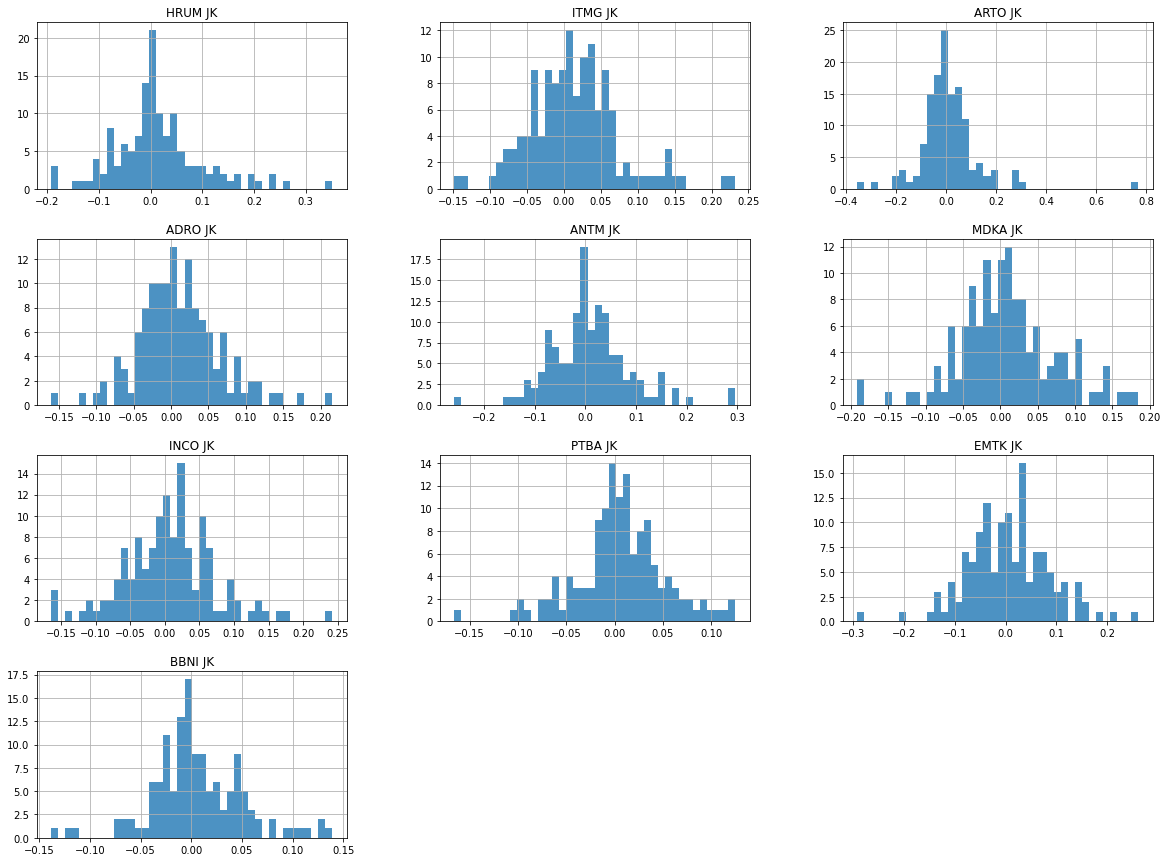

In [17]:
#histogram plot of the returns of each stocks for k = [5,11]
#histrogram plot pengembalian dari masing-masing saham untuk k = [5,11]
rets10.hist(bins=40,figsize=(20,15),alpha=0.8)

In [18]:
#average return of 11 stocks
rets10.mean()

HRUM JK    0.014089
ITMG JK    0.013935
ARTO JK    0.011200
ADRO JK    0.010916
ANTM JK    0.009259
MDKA JK    0.008382
INCO JK    0.006424
PTBA JK    0.006324
EMTK JK    0.006053
BBNI JK    0.005977
dtype: float64

In [19]:
#t is investment time (in weeks). We buy and sell each stocks every week
#waktu investasi dalam minggu (jika ada dan ingin mengcompound return)
t = 1 #dianggap waktu investasi satu minggu, dan jual beli saham setiap minggunya
t

1

In [20]:
#compounded return in t
rlog4 = rets4*t + 1
rlog5 = rets5*t + 1
rlog6 = rets6*t + 1
rlog7 = rets7*t + 1
rlog8 = rets8*t + 1
rlog9 = rets9*t + 1
rlog10 = rets10*t + 1
rlog10

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK,EMTK JK,BBNI JK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.928256,0.868467,1.262364,1.001575,0.982906,0.969695,0.931714,1.078301,1.042650,1.050469
2,0.991701,0.986220,1.037740,0.980952,1.050431,0.984496,1.020980,0.952882,0.959526,1.002235
3,0.995825,1.003454,0.996289,0.975668,0.991769,1.056941,0.971928,1.041536,1.073331,1.022076
4,0.991597,1.010292,1.768317,1.024332,0.996335,1.003683,1.038399,0.995134,0.989848,0.995624
...,...,...,...,...,...,...,...,...,...,...
130,1.058668,1.016359,0.805844,1.031665,1.045120,1.013606,1.037870,1.035091,0.795060,1.047253
131,1.000000,0.941851,0.826213,0.954840,0.947158,0.986394,0.979521,0.959399,0.870383,0.979274
132,0.997147,1.033817,1.139885,1.055496,1.042990,0.981566,1.017094,1.048527,0.944940,1.025841
133,0.993565,1.005527,0.917903,0.979220,0.990050,0.930176,0.954932,0.984085,0.961534,0.950317


In [21]:
#expected return in t
#expected return dalam periode t
er4 = rlog4.mean()
er5 = rlog5.mean()
er6 = rlog6.mean()
er7 = rlog7.mean()
er8 = rlog8.mean()
er9 = rlog9.mean()
er10 = rlog10.mean()
er10

HRUM JK    1.014089
ITMG JK    1.013935
ARTO JK    1.011200
ADRO JK    1.010916
ANTM JK    1.009259
MDKA JK    1.008382
INCO JK    1.006424
PTBA JK    1.006324
EMTK JK    1.006053
BBNI JK    1.005977
dtype: float64

In [22]:
#covariant matrix of logarithmic return
#matriks covariant dari logarithmic return
cov4 = rlog4.cov()
cov5 = rlog5.cov()
cov6 = rlog6.cov()
cov7 = rlog7.cov()
cov8 = rlog8.cov()
cov9 = rlog9.cov()
cov10 = rlog10.cov()

In [23]:
cov4

,HRUM JK,ITMG JK,ARTO JK,ADRO JK
HRUM JK,0.007699,0.001817,0.001122,0.001831
ITMG JK,0.001817,0.003768,-0.000713,0.001789
ARTO JK,0.001122,-0.000713,0.013745,0.000021
ADRO JK,0.001831,0.001789,0.000021,0.003061


In [24]:
cov5

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK
HRUM JK,0.007699,0.001817,0.001122,0.001831,0.003386
ITMG JK,0.001817,0.003768,-0.000713,0.001789,0.000641
ARTO JK,0.001122,-0.000713,0.013745,0.000021,0.001114
ADRO JK,0.001831,0.001789,0.000021,0.003061,0.001113
ANTM JK,0.003386,0.000641,0.001114,0.001113,0.006440


In [25]:
cov6

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK
HRUM JK,0.007699,0.001817,0.001122,0.001831,0.003386,0.001941
ITMG JK,0.001817,0.003768,-0.000713,0.001789,0.000641,0.000074
ARTO JK,0.001122,-0.000713,0.013745,0.000021,0.001114,0.001230
ADRO JK,0.001831,0.001789,0.000021,0.003061,0.001113,0.000844
ANTM JK,0.003386,0.000641,0.001114,0.001113,0.006440,0.002600
MDKA JK,0.001941,0.000074,0.001230,0.000844,0.002600,0.004376


In [26]:
cov7

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK
HRUM JK,0.007699,0.001817,0.001122,0.001831,0.003386,0.001941,0.002986
ITMG JK,0.001817,0.003768,-0.000713,0.001789,0.000641,0.000074,0.000860
ARTO JK,0.001122,-0.000713,0.013745,0.000021,0.001114,0.001230,0.000167
ADRO JK,0.001831,0.001789,0.000021,0.003061,0.001113,0.000844,0.000864
ANTM JK,0.003386,0.000641,0.001114,0.001113,0.006440,0.002600,0.004044
MDKA JK,0.001941,0.000074,0.001230,0.000844,0.002600,0.004376,0.002252
INCO JK,0.002986,0.000860,0.000167,0.000864,0.004044,0.002252,0.004370


In [27]:
cov8

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK
HRUM JK,0.007699,0.001817,0.001122,0.001831,0.003386,0.001941,0.002986,0.001173
ITMG JK,0.001817,0.003768,-0.000713,0.001789,0.000641,0.000074,0.000860,0.001320
ARTO JK,0.001122,-0.000713,0.013745,0.000021,0.001114,0.001230,0.000167,-0.000136
ADRO JK,0.001831,0.001789,0.000021,0.003061,0.001113,0.000844,0.000864,0.001468
ANTM JK,0.003386,0.000641,0.001114,0.001113,0.006440,0.002600,0.004044,0.001078
MDKA JK,0.001941,0.000074,0.001230,0.000844,0.002600,0.004376,0.002252,0.000360
INCO JK,0.002986,0.000860,0.000167,0.000864,0.004044,0.002252,0.004370,0.000669
PTBA JK,0.001173,0.001320,-0.000136,0.001468,0.001078,0.000360,0.000669,0.002162


In [28]:
cov9

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK,EMTK JK
HRUM JK,0.007699,0.001817,0.001122,0.001831,0.003386,0.001941,0.002986,0.001173,0.001202
ITMG JK,0.001817,0.003768,-0.000713,0.001789,0.000641,0.000074,0.000860,0.001320,-0.000677
ARTO JK,0.001122,-0.000713,0.013745,0.000021,0.001114,0.001230,0.000167,-0.000136,0.002911
ADRO JK,0.001831,0.001789,0.000021,0.003061,0.001113,0.000844,0.000864,0.001468,0.000350
ANTM JK,0.003386,0.000641,0.001114,0.001113,0.006440,0.002600,0.004044,0.001078,0.002821
MDKA JK,0.001941,0.000074,0.001230,0.000844,0.002600,0.004376,0.002252,0.000360,0.001298
INCO JK,0.002986,0.000860,0.000167,0.000864,0.004044,0.002252,0.004370,0.000669,0.001247
PTBA JK,0.001173,0.001320,-0.000136,0.001468,0.001078,0.000360,0.000669,0.002162,0.000306
EMTK JK,0.001202,-0.000677,0.002911,0.000350,0.002821,0.001298,0.001247,0.000306,0.006644


In [29]:
cov10

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK,EMTK JK,BBNI JK
HRUM JK,0.007699,0.001817,0.001122,0.001831,0.003386,0.001941,0.002986,0.001173,0.001202,0.000359
ITMG JK,0.001817,0.003768,-0.000713,0.001789,0.000641,0.000074,0.000860,0.001320,-0.000677,0.000488
ARTO JK,0.001122,-0.000713,0.013745,0.000021,0.001114,0.001230,0.000167,-0.000136,0.002911,-0.000042
ADRO JK,0.001831,0.001789,0.000021,0.003061,0.001113,0.000844,0.000864,0.001468,0.000350,0.000540
ANTM JK,0.003386,0.000641,0.001114,0.001113,0.006440,0.002600,0.004044,0.001078,0.002821,0.001300
MDKA JK,0.001941,0.000074,0.001230,0.000844,0.002600,0.004376,0.002252,0.000360,0.001298,0.000474
INCO JK,0.002986,0.000860,0.000167,0.000864,0.004044,0.002252,0.004370,0.000669,0.001247,0.000888
PTBA JK,0.001173,0.001320,-0.000136,0.001468,0.001078,0.000360,0.000669,0.002162,0.000306,0.000519
EMTK JK,0.001202,-0.000677,0.002911,0.000350,0.002821,0.001298,0.001247,0.000306,0.006644,0.000132
BBNI JK,0.000359,0.000488,-0.000042,0.000540,0.001300,0.000474,0.000888,0.000519,0.000132,0.002046


In [30]:
#vector of ones
#vektor baris 1
v1_4 = np.ones(noa4)
v1_5 = np.ones(noa5)
v1_6 = np.ones(noa6)
v1_7 = np.ones(noa7)
v1_8 = np.ones(noa8)
v1_9 = np.ones(noa9)
v1_10 = np.ones(noa10)
v1_10

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
#transposed vectors of ones
#vektor baris 1 (transpose)
onet_4 = np.transpose(v1_4)
onet_5 = np.transpose(v1_5)
onet_6 = np.transpose(v1_6)
onet_7 = np.transpose(v1_7)
onet_8 = np.transpose(v1_8)
onet_9 = np.transpose(v1_9)
onet_10 = np.transpose(v1_10)
onet_10

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Himpunan portfolio optimal yang didapat sebagai solusi dari permasalahan Optimalisasi Markowitz

In [33]:
#expected portfolio returns of global minimum variance
r_gmv_4 = np.dot(onet_4,np.dot((cov4**-1),er4)) / np.dot(onet_4,np.dot((cov4**-1),v1_4))
r_gmv_5 = np.dot(onet_5,np.dot((cov5**-1),er5)) / np.dot(onet_5,np.dot((cov5**-1),v1_5))
r_gmv_6 = np.dot(onet_6,np.dot((cov6**-1),er6)) / np.dot(onet_6,np.dot((cov6**-1),v1_6))
r_gmv_7 = np.dot(onet_7,np.dot((cov7**-1),er7)) / np.dot(onet_7,np.dot((cov7**-1),v1_7))
r_gmv_8 = np.dot(onet_8,np.dot((cov8**-1),er8)) / np.dot(onet_8,np.dot((cov8**-1),v1_8))
r_gmv_9 = np.dot(onet_9,np.dot((cov9**-1),er9)) / np.dot(onet_9,np.dot((cov9**-1),v1_9))
r_gmv_10 = np.dot(onet_10,np.dot((cov10**-1),er10)) / np.dot(onet_10,np.dot((cov10**-1),v1_10))
print('Expected portfolio return of GMV Portfolio with 4 asset in t:', r_gmv_4)
print('Expected portfolio return of GMV Portfolio with 5 asset in t:', r_gmv_5)
print('Expected portfolio return of GMV Portfolio with 6 asset in t:', r_gmv_6)
print('Expected portfolio return of GMV Portfolio with 7 asset in t:', r_gmv_7)
print('Expected portfolio return of GMV Portfolio with 8 asset in t:', r_gmv_8)
print('Expected portfolio return of GMV Portfolio with 9 asset in t:', r_gmv_9)
print('Expected portfolio return of GMV Portfolio with 10 asset in t:', r_gmv_10)

Expected portfolio return of GMV Portfolio with 4 asset in t: 1.011121377746999
Expected portfolio return of GMV Portfolio with 5 asset in t: 1.0111027067604885
Expected portfolio return of GMV Portfolio with 6 asset in t: 1.0110565750361744
Expected portfolio return of GMV Portfolio with 7 asset in t: 1.010794529874965
Expected portfolio return of GMV Portfolio with 8 asset in t: 1.0106981676398368
Expected portfolio return of GMV Portfolio with 9 asset in t: 1.0103615347719357
Expected portfolio return of GMV Portfolio with 10 asset in t: 1.0101318695710175


In [34]:
#variance of gmv
v_gmv_4 = 1 /np.dot(onet_4,np.dot((cov4**-1),v1_4))
v_gmv_5 = 1 /np.dot(onet_5,np.dot((cov5**-1),v1_5))
v_gmv_6 = 1 /np.dot(onet_6,np.dot((cov6**-1),v1_6))
v_gmv_7 = 1 /np.dot(onet_7,np.dot((cov7**-1),v1_7))
v_gmv_8 = 1 /np.dot(onet_8,np.dot((cov8**-1),v1_8))
v_gmv_9 = 1 /np.dot(onet_9,np.dot((cov9**-1),v1_9))
v_gmv_10 = 1 /np.dot(onet_10,np.dot((cov10**-1),v1_10))
print('Variance of GMV Portfolio with 4 asset :', v_gmv_4)
print('Variance of GMV Portfolio with 5 asset :', v_gmv_5)
print('Variance of GMV Portfolio with 6 asset :', v_gmv_6)
print('Variance of GMV Portfolio with 7 asset :', v_gmv_7)
print('Variance of GMV Portfolio with 8 asset :', v_gmv_8)
print('Variance of GMV Portfolio with 9 asset :', v_gmv_9)
print('Variance of GMV Portfolio with 10 asset :', v_gmv_10)

Variance of GMV Portfolio with 4 asset : 1.0386093490424327e-05
Variance of GMV Portfolio with 5 asset : 9.639477913034622e-06
Variance of GMV Portfolio with 6 asset : 7.309979436895161e-06
Variance of GMV Portfolio with 7 asset : 6.424226998314719e-06
Variance of GMV Portfolio with 8 asset : 6.393624348516145e-06
Variance of GMV Portfolio with 9 asset : 5.8116091508851316e-06
Variance of GMV Portfolio with 10 asset : 6.031808290289403e-06


In [35]:
ss_4 = ((cov4**-1)*v1_4*onet_4*(cov4**-1)) / (onet_4*(cov4**-1)*v1_4)
ss_5 = ((cov5**-1)*v1_5*onet_5*(cov5**-1)) / (onet_5*(cov5**-1)*v1_5)
ss_6 = ((cov6**-1)*v1_6*onet_6*(cov6**-1)) / (onet_6*(cov6**-1)*v1_6)
ss_7 = ((cov7**-1)*v1_7*onet_7*(cov7**-1)) / (onet_7*(cov7**-1)*v1_7)
ss_8 = ((cov8**-1)*v1_8*onet_8*(cov8**-1)) / (onet_8*(cov8**-1)*v1_8)
ss_9 = ((cov9**-1)*v1_9*onet_9*(cov9**-1)) / (onet_9*(cov9**-1)*v1_9)
ss_10 = ((cov10**-1)*v1_10*onet_10*(cov10**-1)) / (onet_10*(cov10**-1)*v1_10)
q4 = (cov4**-1) - ss_4
q5 = (cov5**-1) - ss_5
q6 = (cov6**-1) - ss_6
q7 = (cov7**-1) - ss_7
q8 = (cov8**-1) - ss_8
q9 = (cov9**-1) - ss_9
q10 = (cov10**-1) - ss_10

In [36]:
q4

,HRUM JK,ITMG JK,ARTO JK,ADRO JK
HRUM JK,0.0,0.0,0.000000e+00,0.000000e+00
ITMG JK,0.0,0.0,0.000000e+00,0.000000e+00
ARTO JK,0.0,0.0,0.000000e+00,7.275958e-12
ADRO JK,0.0,0.0,7.275958e-12,0.000000e+00


In [37]:
q5

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK
HRUM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0
ITMG JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0
ARTO JK,0.0,0.0,0.000000e+00,7.275958e-12,0.0
ADRO JK,0.0,0.0,7.275958e-12,0.000000e+00,0.0
ANTM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0


In [38]:
q6

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK
HRUM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
ITMG JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
ARTO JK,0.0,0.0,0.000000e+00,7.275958e-12,0.0,0.0
ADRO JK,0.0,0.0,7.275958e-12,0.000000e+00,0.0,0.0
ANTM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
MDKA JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0


In [39]:
q7

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK
HRUM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
ITMG JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
ARTO JK,0.0,0.0,0.000000e+00,7.275958e-12,0.0,0.0,0.0
ADRO JK,0.0,0.0,7.275958e-12,0.000000e+00,0.0,0.0,0.0
ANTM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
MDKA JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
INCO JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0


In [40]:
q8

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK
HRUM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
ITMG JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
ARTO JK,0.0,0.0,0.000000e+00,7.275958e-12,0.0,0.0,0.0,0.0
ADRO JK,0.0,0.0,7.275958e-12,0.000000e+00,0.0,0.0,0.0,0.0
ANTM JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
MDKA JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
INCO JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
PTBA JK,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0


In [41]:
q9

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK,EMTK JK
HRUM JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.136868e-13
ITMG JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2.273737e-13
ARTO JK,0.000000e+00,0.000000e+00,0.000000e+00,7.275958e-12,0.0,0.0,0.0,0.000000e+00,0.000000e+00
ADRO JK,0.000000e+00,0.000000e+00,7.275958e-12,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
ANTM JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
MDKA JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
INCO JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
PTBA JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,-4.547474e-13
EMTK JK,1.136868e-13,2.273737e-13,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-4.547474e-13,0.000000e+00


In [42]:
q10

,HRUM JK,ITMG JK,ARTO JK,ADRO JK,ANTM JK,MDKA JK,INCO JK,PTBA JK,EMTK JK,BBNI JK
HRUM JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.136868e-13,0.0
ITMG JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2.273737e-13,0.0
ARTO JK,0.000000e+00,0.000000e+00,0.000000e+00,7.275958e-12,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
ADRO JK,0.000000e+00,0.000000e+00,7.275958e-12,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
ANTM JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
MDKA JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
INCO JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
PTBA JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,-4.547474e-13,0.0
EMTK JK,1.136868e-13,2.273737e-13,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-4.547474e-13,0.000000e+00,0.0
BBNI JK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0


In [43]:
#transposed expected return in t weeks
#expected return dalam periode t yang ditranspose
ert4 = np.transpose(er4)
ert5 = np.transpose(er5)
ert6 = np.transpose(er6)
ert7 = np.transpose(er7)
ert8 = np.transpose(er8)
ert9 = np.transpose(er9)
ert10 = np.transpose(er10)
ert10

HRUM JK    1.014089
ITMG JK    1.013935
ARTO JK    1.011200
ADRO JK    1.010916
ANTM JK    1.009259
MDKA JK    1.008382
INCO JK    1.006424
PTBA JK    1.006324
EMTK JK    1.006053
BBNI JK    1.005977
dtype: float64

In [44]:
#slope parameter
s4 = np.dot(ert4, np.dot(q4,er4))
s5 = np.dot(ert5, np.dot(q5,er5))
s6 = np.dot(ert6, np.dot(q6,er6))
s7 = np.dot(ert7, np.dot(q7,er7))
s8 = np.dot(ert8, np.dot(q8,er8))
s9 = np.dot(ert9, np.dot(q9,er9))
s10 = np.dot(ert10, np.dot(q10,er10))
print('Slope parameter of GMV Portfolio with 4 asset :',s4)
print('Slope parameter of GMV Portfolio with 5 asset :',s5)
print('Slope parameter of GMV Portfolio with 6 asset :',s6)
print('Slope parameter of GMV Portfolio with 7 asset :',s7)
print('Slope parameter of GMV Portfolio with 8 asset :',s8)
print('Slope parameter of GMV Portfolio with 9 asset :',s9)
print('Slope parameter of GMV Portfolio with 10 asset :',s10)

Slope parameter of GMV Portfolio with 4 asset : 1.4875533226216638e-11
Slope parameter of GMV Portfolio with 5 asset : 1.4875533226216638e-11
Slope parameter of GMV Portfolio with 6 asset : 1.4875533226216638e-11
Slope parameter of GMV Portfolio with 7 asset : 1.4875533226216638e-11
Slope parameter of GMV Portfolio with 8 asset : 1.4875533226216638e-11
Slope parameter of GMV Portfolio with 9 asset : 1.4650594423350087e-11
Slope parameter of GMV Portfolio with 10 asset : 1.4650594423350087e-11


Solusi Analitikal dari Fungsi Daya Guna 

Analitical solution of Power Utility Function

In [45]:
#jika asumsi A1 benar, maka gamma adalah constant relative risk aversion pada fungsi daya guna
gamma4 = 2*s4 + 2*((s4*(1+s4)*(v_gmv_4/((r_gmv_4)**2))) 
                   +  np.sqrt(s4*(1+s4)*(1+((s4*(v_gmv_4))/((r_gmv_4)**2)))
                                                           *(1+((1+s4)*(v_gmv_4/((r_gmv_4)**2))))))
gamma5 = 2*s5 + 2*((s5*(1+s5)*(v_gmv_5/((r_gmv_5)**2))) 
                   +  np.sqrt(s5*(1+s5)*(1+((s5*(v_gmv_5))/((r_gmv_5)**2)))
                                                           *(1+((1+s5)*(v_gmv_5/((r_gmv_5)**2))))))
gamma6 = 2*s6 + 2*((s6*(1+s6)*(v_gmv_6/((r_gmv_6)**2))) 
                   +  np.sqrt(s6*(1+s6)*(1+((s6*(v_gmv_6))/((r_gmv_6)**2)))
                                                           *(1+((1+s6)*(v_gmv_6/((r_gmv_6)**2))))))
gamma7 = 2*s7 + 2*((s7*(1+s7)*(v_gmv_7/((r_gmv_7)**2))) 
                   +  np.sqrt(s7*(1+s7)*(1+((s7*(v_gmv_7))/((r_gmv_7)**2)))
                                                           *(1+((1+s7)*(v_gmv_7/((r_gmv_7)**2))))))
gamma8 = 2*s8 + 2*((s8*(1+s8)*(v_gmv_8/((r_gmv_8)**2))) 
                   +  np.sqrt(s8*(1+s8)*(1+((s8*(v_gmv_8))/((r_gmv_8)**2)))
                                                           *(1+((1+s8)*(v_gmv_8/((r_gmv_8)**2))))))
gamma9 = 2*s9 + 2*((s9*(1+s9)*(v_gmv_9/((r_gmv_9)**2))) 
                   +  np.sqrt(s9*(1+s9)*(1+((s9*(v_gmv_9))/((r_gmv_9)**2)))
                                                           *(1+((1+s9)*(v_gmv_9/((r_gmv_9)**2))))))
gamma10 = 2*s10 + 2*((s10*(1+s10)*(v_gmv_10/((r_gmv_10)**2))) 
                     +  np.sqrt(s10*(1+s10)*(1+((s10*(v_gmv_10))/((r_gmv_10)**2)))
                                                           *(1+((1+s10)*(v_gmv_10/((r_gmv_10)**2))))))
print('Minimum Gamma of 4 asset of power utility function :',gamma4)
print('Minimum Gamma of 5 asset of power utility function :',gamma5)
print('Minimum Gamma of 6 asset of power utility function :',gamma6)
print('Minimum Gamma of 7 asset of power utility function :',gamma7)
print('Minimum Gamma of 8 asset of power utility function :',gamma8)
print('Minimum Gamma of 9 asset of power utility function :',gamma9)
print('Minimum Gamma of 10 asset of power utility function :',gamma10)

Minimum Gamma of 4 asset of power utility function : 7.713831497623127e-06
Minimum Gamma of 5 asset of power utility function : 7.713828682348135e-06
Minimum Gamma of 6 asset of power utility function : 7.713819896467033e-06
Minimum Gamma of 7 asset of power utility function : 7.713816567088886e-06
Minimum Gamma of 8 asset of power utility function : 7.71381645616759e-06
Minimum Gamma of 9 asset of power utility function : 7.655270076068745e-06
Minimum Gamma of 10 asset of power utility function : 7.655270911995967e-06


Dapat dilihat bahwa untuk jumlah aset pada portfolio untuk k jumlah asset  [4.10] terdapat Gamma. Sehingga. terdapat resiko minimal. Sehingga, fungsi daya guna dapat dipakai.

In [46]:
gamma1_4 = gamma4 + 1
gamma1_5 = gamma5 + 1
gamma1_6 = gamma6 + 1
gamma1_7 = gamma7 + 1
gamma1_8 = gamma8 + 1
gamma1_9 = gamma9 + 1
gamma1_10 = gamma10 + 1
gamma2_4 = gamma4 + 1
gamma2_5 = gamma5 + 1
gamma2_6 = gamma6 + 1
gamma2_7 = gamma7 + 2
gamma2_8 = gamma8 + 2
gamma2_9 = gamma9 + 2
gamma2_10 = gamma10 + 2

Theorem 1 when gamma = gamma minimum

In [47]:
#Quadratic result of x and y
d1_4 = ((gamma2_4)**2)*(((r_gmv_4)**2)) - 4*(gamma1_4)*(1+s4)*(((r_gmv_4)**2)+(s4*v_gmv_4))
d1_5 = ((gamma2_5)**2)*(((r_gmv_5)**2)) - 4*(gamma1_5)*(1+s5)*(((r_gmv_5)**2)+(s5*v_gmv_5))
d1_6 = ((gamma2_6)**2)*(((r_gmv_6)**2)) - 4*(gamma1_6)*(1+s6)*(((r_gmv_6)**2)+(s6*v_gmv_6))
d1_7 = ((gamma2_7)**2)*(((r_gmv_7)**2)) - 4*(gamma1_7)*(1+s7)*(((r_gmv_7)**2)+(s7*v_gmv_7))
d1_8 = ((gamma2_8)**2)*(((r_gmv_8)**2)) - 4*(gamma1_8)*(1+s8)*(((r_gmv_8)**2)+(s8*v_gmv_8))
d1_9 = ((gamma2_9)**2)*(((r_gmv_9)**2)) - 4*(gamma1_9)*(1+s9)*(((r_gmv_9)**2)+(s9*v_gmv_9))
d1_10 = ((gamma2_10)**2)*(((r_gmv_10)**2)) - 4*(gamma1_10)*(1+s10)*(((r_gmv_10)**2)+(s10*v_gmv_10))
print('Quadratic result of x and y with 4 asset: ',d1_4)
print('Quadratic result of x and y with 5 asset: ',d1_5)
print('Quadratic result of x and y with 6 asset: ',d1_6)
print('Quadratic result of x and y with 7 asset: ',d1_7)
print('Quadratic result of x and y with 8 asset: ',d1_8)
print('Quadratic result of x and y with 9 asset: ',d1_9)
print('Quadratic result of x and y with 10 asset: ',d1_10)

Quadratic result of x and y with 4 asset:  -3.06711509433587
Quadratic result of x and y with 5 asset:  -3.067001822991805
Quadratic result of x and y with 6 asset:  -3.06672196445114
Quadratic result of x and y with 7 asset:  8.881784197001252e-16
Quadratic result of x and y with 8 asset:  0.0
Quadratic result of x and y with 9 asset:  0.0
Quadratic result of x and y with 10 asset:  -8.881784197001252e-16


If gamma = gamma min , then d=0. 8 and 9 asset have gamma = 0, and D>=0. So portfolio with 4,5,6 asset doesn't qualify.

In [48]:
x1_8 = ((gamma2_8)*r_gmv_8) / (2*(1+s8))
x1_9 = ((gamma2_9)*r_gmv_9) / (2*(1+s9))
print('Weights at the end of period by Theorem 1 with 8 asset: ',x1_8)
print('Weights at the end of period by Theorem 1 with 9 asset: ',x1_9)

Weights at the end of period by Theorem 1 with 8 asset:  1.010702065794881
Weights at the end of period by Theorem 1 with 9 asset:  1.010365402052345


In [49]:
y1_8 = (gamma8/s8)*(x1_8*r_gmv_8 - ((r_gmv_8)**2) - s8*v_gmv_8)
y1_9 = (gamma9/s9)*(x1_9*r_gmv_9 - ((r_gmv_9)**2) - s9*v_gmv_9)
print('y with 8 asset :',y1_8)
print('y with 9 asset :',y1_9)

y with 8 asset : 2.0430422392015077
y with 9 asset : 2.041680299983478


In [50]:
#portfolio variance
var1_8 = y1_8-(x1_8**2)
var1_9 = y1_9-(x1_9**2)
print('Variance of Portfolio selection by Theorem 1 with 8 asset :',var1_8)
print('Variance of Portfolio selection by Theorem 1 with 9 asset :',var1_9)

Variance of Portfolio selection by Theorem 1 with 8 asset : 1.0215235733994676
Variance of Portfolio selection by Theorem 1 with 9 asset : 1.0208420543190815


In [51]:
w_gmv_5 = (np.dot((cov5**-1),v1_5))/(np.dot(onet_5,np.dot((cov5**-1),v1_5)))
w_gmv_6 = (np.dot((cov6**-1),v1_6))/(np.dot(onet_6,np.dot((cov6**-1),v1_6)))
w_gmv_7 = (np.dot((cov7**-1),v1_7))/(np.dot(onet_7,np.dot((cov7**-1),v1_7)))
w_gmv_8 = (np.dot((cov8**-1),v1_8))/(np.dot(onet_8,np.dot((cov8**-1),v1_8)))
w_gmv_9 = (np.dot((cov9**-1),v1_9))/(np.dot(onet_9,np.dot((cov9**-1),v1_9)))
w_gmv_10 = (np.dot((cov10**-1),v1_10))/(np.dot(onet_10,np.dot((cov10**-1),v1_10)))
print('Weights of GMV at the end of period with 5 asset :')
print(symbols5, '=', w_gmv_5)
print('Weights of GMV at the end of period with 6 asset :')
print(symbols6, '=', w_gmv_6)
print('Weights of GMV at the end of period with 7 asset :')
print(symbols7, '=', w_gmv_7)
print('Weights of GMV at the end of period with 8 asset :')
print(symbols8, '=', w_gmv_8)
print('Weights of GMV at the end of period with 9 asset :')
print(symbols9, '=', w_gmv_9)
print('Weights of GMV at the end of period with 10 asset :')
print(symbols10, '=', w_gmv_10)

Weights of GMV at the end of period with 5 asset :
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK'] = [0.02326325 0.01476751 0.4536224  0.47165542 0.03669142]
Weights of GMV at the end of period with 6 asset :
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK'] = [0.02140723 0.11001675 0.34993979 0.3663343  0.03063556 0.12166636]
Weights of GMV at the end of period with 7 asset :
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK'] = [0.02096471 0.10415388 0.34589452 0.32937835 0.02851203 0.10977639
 0.06132012]
Weights of GMV at the end of period with 8 asset :
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK'] = [0.02631354 0.10850295 0.29724808 0.33216365 0.03430801 0.12702349
 0.07057997 0.00386031]
Weights of GMV at the end of period with 9 asset :
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK', 'EMTK JK'] = [0.02875514 0.09003707 0.27218565 0.31854967 0.03

In [52]:
weights_t1_8 = w_gmv_8 + ((x1_8-r_gmv_8)/s8)*(np.dot(q8,er8))
weights_t1_9 = w_gmv_9 + ((x1_9-r_gmv_9)/s9)*(np.dot(q9,er9))
print('Weights at the end of period Theorem 1 with 8 asset')
print(symbols8,'=',weights_t1_8)
print('Weights at the end of period Theorem 1 with 9 asset')
print(symbols9,'=',weights_t1_9)

Weights at the end of period Theorem 1 with 8 asset
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK'] = [0.02631354 0.10850295 0.29725001 0.33216557 0.03430801 0.12702349
 0.07057997 0.00386031]
Weights at the end of period Theorem 1 with 9 asset
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK', 'EMTK JK'] = [0.02875517 0.09003713 0.27218759 0.31855162 0.03324501 0.11993948
 0.06881668 0.02251856 0.04595258]


Teorema 3 saat gamma minimum <= 1

In [53]:
#Quadratic result of x and y
d3_4 = (9*((r_gmv_4)**2)) - 8*(1+s4)*(((r_gmv_4)**2)+(s4*v_gmv_4))
d3_5 = (9*((r_gmv_5)**2)) - 8*(1+s5)*(((r_gmv_5)**2)+(s5*v_gmv_5))
d3_6 = (9*((r_gmv_6)**2)) - 8*(1+s6)*(((r_gmv_6)**2)+(s6*v_gmv_6))
d3_7 = (9*((r_gmv_7)**2)) - 8*(1+s7)*(((r_gmv_7)**2)+(s7*v_gmv_7))
d3_8 = (9*((r_gmv_8)**2)) - 8*(1+s8)*(((r_gmv_8)**2)+(s8*v_gmv_8))
d3_9 = (9*((r_gmv_9)**2)) - 8*(1+s9)*(((r_gmv_9)**2)+(s9*v_gmv_9))
d3_10 = (9*((r_gmv_10)**2)) - 8*(1+s10)*(((r_gmv_10)**2)+(s10*v_gmv_10))
print('Quadratic result of x and y with 4 asset: ',d3_4)
print('Quadratic result of x and y with 5 asset: ',d3_5)
print('Quadratic result of x and y with 6 asset: ',d3_6)
print('Quadratic result of x and y with 7 asset: ',d3_7)
print('Quadratic result of x and y with 8 asset: ',d3_8)
print('Quadratic result of x and y with 9 asset: ',d3_9)
print('Quadratic result of x and y with 10 asset: ',d3_10)

Quadratic result of x and y with 4 asset:  1.0223664404153237
Quadratic result of x and y with 5 asset:  1.022328683496724
Quadratic result of x and y with 6 asset:  1.0222353978022287
Quadratic result of x and y with 7 asset:  1.021705581503566
Quadratic result of x and y with 8 asset:  1.0215107859489603
Quadratic result of x and y with 9 asset:  1.020830430827056
Quadratic result of x and y with 10 asset:  1.0203663938034477


In [54]:
x3_4 = (3*r_gmv_4 - np.sqrt(d3_4)) / (2*(1+s4))
x3_5 = (3*r_gmv_5 - np.sqrt(d3_5)) / (2*(1+s5))
x3_6 = (3*r_gmv_6 - np.sqrt(d3_6)) / (2*(1+s6))
x3_7 = (3*r_gmv_7 - np.sqrt(d3_7))/ (2*(1+s7))
x3_8 = (3*r_gmv_8 - np.sqrt(d3_8)) / (2*(1+s8))
x3_9 = (3*r_gmv_9 - np.sqrt(d3_9)) / (2*(1+s9))
x3_10 = (3*r_gmv_10 - np.sqrt(d3_10)) / (2*(1+s10))
print('Weights at the end of period by Theorem 3 with 4 asset: ',x3_4)
print('Weights at the end of period by Theorem 3 with 5 asset: ',x3_5)
print('Weights at the end of period by Theorem 3 with 6 asset: ',x3_6)
print('Weights at the end of period by Theorem 3 with 7 asset: ',x3_7)
print('Weights at the end of period by Theorem 3 with 8 asset: ',x3_8)
print('Weights at the end of period by Theorem 3 with 9 asset: ',x3_9)
print('Weights at the end of period by Theorem 3 with 10 asset: ',x3_10)

Weights at the end of period by Theorem 3 with 4 asset:  1.0111213777620398
Weights at the end of period by Theorem 3 with 5 asset:  1.0111027067755296
Weights at the end of period by Theorem 3 with 6 asset:  1.0110565750512146
Weights at the end of period by Theorem 3 with 7 asset:  1.0107945298900007
Weights at the end of period by Theorem 3 with 8 asset:  1.0106981676548714
Weights at the end of period by Theorem 3 with 9 asset:  1.010361534786738
Weights at the end of period by Theorem 3 with 10 asset:  1.0101318695858166


In [55]:
y3_4 = (((x3_4*r_gmv_4) - ((r_gmv_4)**2))/s4)- (s6*v_gmv_4)
y3_5 = (((x3_5*r_gmv_5) - ((r_gmv_5)**2))/s5)- (s6*v_gmv_5)
y3_6 = (((x3_6*r_gmv_6) - ((r_gmv_6)**2))/s6)- (s6*v_gmv_6)
y3_7 = (((x3_7*r_gmv_7) - ((r_gmv_7)**2))/s7)- (s6*v_gmv_7)
y3_8 = (((x3_8*r_gmv_8) - ((r_gmv_8)**2))/s8)- (s6*v_gmv_8)
y3_9 = (((x3_9*r_gmv_9) - ((r_gmv_9)**2))/s9)- (s6*v_gmv_9)
y3_10 = (((x3_10*r_gmv_10) - ((r_gmv_10)**2))/s10)- (s6*v_gmv_10)
print('y with 4 asset :',y3_4)
print('y with 5 asset :',y3_5)
print('y with 6 asset :',y3_6)
print('y with 7 asset :',y3_7)
print('y with 8 asset :',y3_8)
print('y with 9 asset :',y3_9)
print('y with 10 asset :',y3_10)

y with 4 asset : 1.0223537405111394
y with 5 asset : 1.0223537405111394
y with 6 asset : 1.0222492526779414
y with 7 asset : 1.0216820330120082
y with 8 asset : 1.02150291101224
y with 9 asset : 1.0208332803813707
y with 10 asset : 1.020363443966972


In [56]:
#portfolio variance
var3_4 = y3_4-(x3_4**2)
var3_5 = y3_5-(x3_5**2)
var3_6 = y3_6-(x3_6**2)
var3_7 = y3_7-(x3_7**2)
var3_8 = y3_8-(x3_8**2)
var3_9 = y3_9-(x3_9**2)
var3_10 = y3_10-(x3_10**2)
print('Variance of Portfolio selection by Theorem 3 with 4 asset :',var3_4)
print('Variance of Portfolio selection by Theorem 3 with 5 asset :',var3_5)
print('Variance of Portfolio selection by Theorem 3 with 6 asset :',var3_6)
print('Variance of Portfolio selection by Theorem 3 with 7 asset :',var3_7)
print('Variance of Portfolio selection by Theorem 3 with 8 asset :',var3_8)
print('Variance of Portfolio selection by Theorem 3 with 9 asset :',var3_9)
print('Variance of Portfolio selection by Theorem 3 with 10 asset :',var3_10)

Variance of Portfolio selection by Theorem 3 with 4 asset : -1.270005626619053e-05
Variance of Portfolio selection by Theorem 3 with 5 asset : 2.505686233678084e-05
Variance of Portfolio selection by Theorem 3 with 6 asset : 1.3854723649009415e-05
Variance of Portfolio selection by Theorem 3 with 7 asset : -2.3548643539372804e-05
Variance of Portfolio selection by Theorem 3 with 8 asset : -7.875088674502706e-06
Variance of Portfolio selection by Theorem 3 with 9 asset : 2.8494047576987924e-06
Variance of Portfolio selection by Theorem 3 with 10 asset : -2.9499859650616855e-06


In [57]:
weights_t3_5 = w_gmv_5 + ((x3_5-r_gmv_5)/s5)*(np.dot(q5,er5))
weights_t3_6 = w_gmv_6 + ((x3_6-r_gmv_6)/s6)*(np.dot(q6,er6))
weights_t3_9 = w_gmv_9 + ((x3_9-r_gmv_9)/s9)*(np.dot(q9,er9))
print('Weights at the end of period Theorem 3 with 5 asset')
print(symbols5,'=',weights_t3_5)
print('Weights at the end of period Theorem 3 with 6 asset')
print(symbols6,'=',weights_t3_6)
print('Weights at the end of period Theorem 3 with 9 asset')
print(symbols9,'=',weights_t3_9)

Weights at the end of period Theorem 3 with 5 asset
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK'] = [0.02326325 0.01476751 0.4536224  0.47165542 0.03669142]
Weights at the end of period Theorem 3 with 6 asset
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK'] = [0.02140723 0.11001675 0.34993979 0.3663343  0.03063556 0.12166636]
Weights at the end of period Theorem 3 with 9 asset
['HRUM JK', 'ITMG JK', 'ARTO JK', 'ADRO JK', 'ANTM JK', 'MDKA JK', 'INCO JK', 'PTBA JK', 'EMTK JK'] = [0.02875514 0.09003707 0.27218565 0.31854967 0.03324501 0.11993948
 0.06881668 0.02251869 0.04595261]


weights at the end of period Theorem 1

In [58]:
w1 = np.sum(w_gmv_8*np.array(er8)) #total weights for w_gmv
w1

1.0106981676398372

In [59]:
#the highest weights at the end of period teorema 1 
x1_8

1.010702065794881

In [60]:
weights_t1_8.sum()

1.0000038555196407

In [61]:
x1_8>=w1

True

In [62]:
r_gmv_8>0

True

In [63]:
r_gmv_8

1.0106981676398368

In [64]:
gamma8

7.71381645616759e-06

In [65]:
var1_8

1.0215235733994676

In [66]:
volati_t1 = math.sqrt(var1_8)
volati_t1
#portfolio volatility of weights

1.0107044936080316

weights at the end of period Theorem 3

In [67]:
w3 = np.sum(w_gmv_5*np.array(er5)) #total weights for w_gmv
w3

1.0111027067604885

In [68]:
weights_t3_5.sum()

1.0000000000148765

In [69]:
x3_5

1.0111027067755296

In [70]:
x3_5>=w3

True

In [71]:
r_gmv_5>0

True

In [72]:
r_gmv_5

1.0111027067604885

In [73]:
gamma5

7.713828682348135e-06

In [74]:
var3_5

2.505686233678084e-05

In [75]:
volati_t3 = math.sqrt(var3_5)
volati_t3 #with 8 asset
#portfolio volatility of weights

0.005005683004024609